In [276]:
import numpy as np
from matplotlib.pyplot import plot

In [314]:
def detect(predicts,raw,windows=26,threshold=0.8,raw_threshold=-10):
    taps=np.zeros_like(predicts)
    windows_count=0
    buff_size=100
    
    for i in np.arange(buff_size,len(taps)):
        raw_buff=raw[i-buff_size:i+1,2]# only z acc
        #print(raw_buff.min())
        #diff=abs(raw_buff.max()-raw_buff.min())
        buff_sum = 0
        for x in raw_buff:
            if x <0:
                buff_sum+= x*-1
        
        if predicts[i]>threshold and windows_count==0  and buff_sum>raw_threshold:# and diff>6:# and predicts[i-1]>threshold:
            #print(diff)
            taps[i]=1
            windows_count=windows
            #print(buff_sum)
        else:
            windows_count=max(windows_count-1,0)
    return taps

In [326]:
def verify(taps,label_taps,raw):
    False_positive= np.zeros_like(taps)
    False_negtive = np.zeros_like(taps)
    True_positive = np.zeros_like(taps)
    #taps=np.append(np.zeros([1]),taps)
    #taps=np.append(taps,np.zeros([1]))
    #label_taps=np.append(np.zeros([1]),label_taps)
    #label_taps=np.append(label_taps,np.zeros([1]))
    window=15
    for i in range(len(taps)):
        if label_taps[i] ==1:
            if taps[i-window:i+window].sum()==0:
                False_negtive[i]=1
            else:
                True_positive[i]=1

        if taps[i] ==1:
            if label_taps[i-window:i+window].sum()==0:
                False_positive[i]=1
                #raw_buff=raw[i-4:i+1,2]# only z acc
                #diff=abs(raw_buff.max()-raw_buff.min())
                #print(i,raw_buff,diff)
            
    return [False_positive,  False_negtive ,    True_positive ]

In [45]:
label_taps.sum()

1081.0

In [293]:
labels_100hz =np.loadtxt('./TapData/data_100Hz_y.csv',delimiter=",")
raw_data_100hz = np.loadtxt('./TapData/data_raw_100Hz.csv',delimiter=",")
labels_100hz.sum()

9216.0

In [311]:
preY= np.loadtxt('./models/100hz/realLSTM_data_U64_i50_mse10.03_3.49_preY.csv',delimiter=",")

In [321]:
taps_predict=detect(preY,raw=raw_data)
np.savetxt('taps_predict_100hz.csv',taps_predict)

In [317]:
taps_predict.sum()

2532.0

In [327]:
FP,FN,TP = verify(taps_predict,taps_label,raw_data)
print(FP.sum(),FN.sum(),TP.sum())
np.savetxt('FP_vali.csv',FP)
np.savetxt('FN_vali.csv',FN)
np.savetxt('TP_vali.csv',TP)

1110.0 129.0 1407.0


In [308]:
taps_label=detect(labels_100hz,raw=raw_data_100hz)

In [309]:
taps_label.sum()

1536.0

In [297]:
np.savetxt('label_taps_100hz.csv',taps_label)

In [240]:
predicts_92 = np.loadtxt('TF_predictY_64U3C_92.csv',delimiter=",")
predicts_71 = np.loadtxt('TF_predictY_64U3C_71.csv',delimiter=",")
predicts_V2_56 = np.loadtxt('TF_predictY_64U3C_dataV2_56.20.csv',delimiter=",")
labels = np.loadtxt('./TapData/data_y_active.csv',delimiter=",")
raw_data=np.loadtxt('./TapData/data_raw_active.csv',delimiter=',')
raw_data=raw_data[:,3:6]
labels.sum()/3

1107.3333333333333

In [275]:
taps_92=detect(predicts_92,raw=raw_data)
taps_71=detect(predicts_71,raw=raw_data)
taps_V2_56=detect(predicts_V2_56,raw=raw_data)
#taps_vali = detect(predicts_validate,raw=raw_data)
label_taps=detect(labels,raw=raw_data)
label_taps.sum()

847.0

In [234]:
predicts_validate = np.loadtxt('validation_preY.csv',delimiter=",")
#predicts_71 = np.loadtxt('TF_predictY_64U3C_71.csv',delimiter=",")
#predicts_V2_56 = np.loadtxt('TF_predictY_64U3C_dataV2_56.20.csv',delimiter=",")
labels = np.loadtxt('./TapData/validation_y.csv',delimiter=",")
raw_data=np.loadtxt('./TapData/validation_raw.csv',delimiter=',')
raw_data=raw_data[:,3:6]
labels.sum()/3

87.66666666666667

In [236]:
#taps_92=detect(predicts_92,raw=raw_data)
#taps_71=detect(predicts_71,raw=raw_data)
#taps_V2_56=detect(predicts_V2_56,raw=raw_data)
taps_vali = detect(predicts_validate,raw=raw_data)
label_taps=detect(labels,raw=raw_data)
label_taps.sum()

88.0

label_taps  = 1006 for raw_threshold = 13      
label_taps  = 1050 for raw_threshold = 10

In [239]:
FP,FN,TP = verify(taps_vali,label_taps,raw_data)
print(FP.sum(),FN.sum(),TP.sum())
np.savetxt('label_taps.csv',label_taps)
np.savetxt('FP_vali.csv',FP)
np.savetxt('FN_vali.csv',FN)
np.savetxt('TP_vali.csv',TP)

3.0 8.0 80.0


30.0 78.0 972.0 for raw_threshold = 10        
26.0 55.0 951.0 for raw_threshold = 13


In [271]:
FP,FN,TP = verify(taps_92,label_taps,raw_data)
print(FP.sum(),FN.sum(),TP.sum())

50.0 59.0 979.0


In [98]:
FP.shape

(96379,)

In [153]:
np.savetxt('label_taps.csv',label_taps)
np.savetxt('FP_92.csv',FP)
np.savetxt('FN_92.csv',FN)
np.savetxt('TP_92.csv',TP)

In [24]:
print(taps)

[1. 0. 0. ... 0. 0. 0.]


In [25]:
print(label_taps)

[0. 0. 0. ... 0. 0. 0.]


In [27]:
diff = taps-label_taps

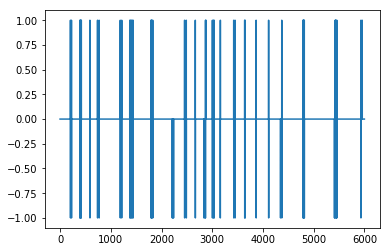

In [33]:
plot(diff[2000:8000])